In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(pd.__version__)

2.1.1


In [43]:
cols = ['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
df = pd.read_csv('titanic/train.csv', usecols=cols)



In [44]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [47]:
#replacing the string gender data into numbers
# 0 - Male
# 1 - Female

df.replace("male",0, inplace=True)
df.replace("female", 1, inplace=True)





In [52]:
# we have certain missing values in the column age
# we are going to fill the issing values using mean 

age_mean = df['Age'].mean()
floor_mean = age_mean // 1
df.fillna(floor_mean, inplace=True)

df['Age'] = df['Age'].astype('int64')



In [55]:
df.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare
0              1         0       3    0   22      1      0   7.2500
1              2         1       1    1   38      1      0  71.2833
2              3         1       3    1   26      0      0   7.9250
3              4         1       1    1   35      1      0  53.1000
4              5         0       3    0   35      0      0   8.0500
..           ...       ...     ...  ...  ...    ...    ...      ...
886          887         0       2    0   27      0      0  13.0000
887          888         1       1    1   19      0      0  30.0000
888          889         0       3    1   29      1      2  23.4500
889          890         1       1    0   26      0      0  30.0000
890          891         0       3    0   32      0      0   7.7500

[891 rows x 8 columns]>

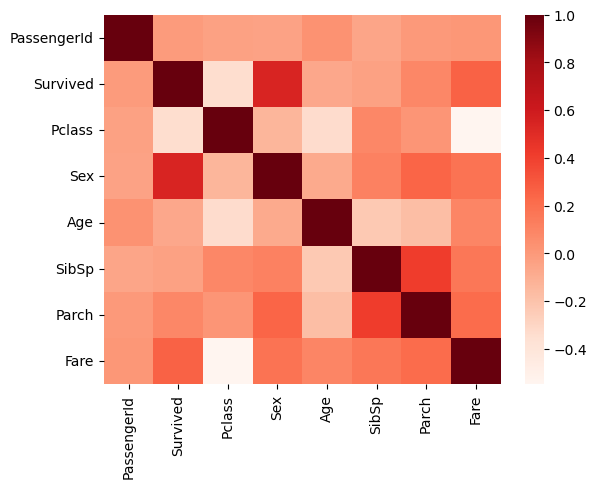

In [50]:
#correlation matrix with all the parameters present in the given data
sns.heatmap(df.corr(), cmap="Reds")
plt.show()




In [56]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22,1,0,7.2500
1,2,1,1,1,38,1,0,71.2833
2,3,1,3,1,26,0,0,7.9250
3,4,1,1,1,35,1,0,53.1000
4,5,0,3,0,35,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000
887,888,1,1,1,19,0,0,30.0000
888,889,0,3,1,29,1,2,23.4500
889,890,1,1,0,26,0,0,30.0000


In [73]:
# Group the data by Pclass and Survived, and count the occurrences
pclass_data = df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()
pclass_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Figure size 800x600 with 0 Axes>

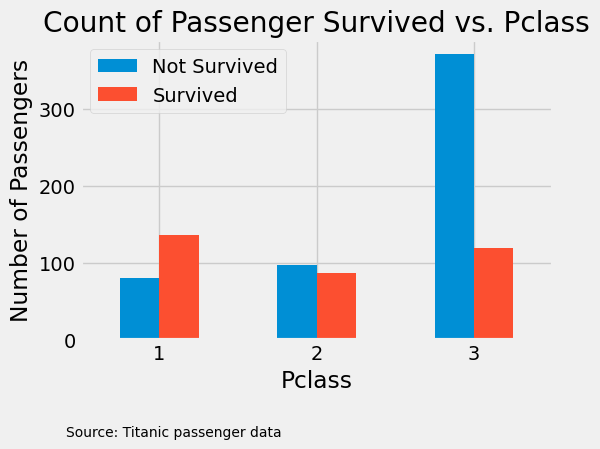

In [133]:
# Create the bar chart for Pclass count and Survivability
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
pclass_data.plot(kind='bar')
plt.title('Count of Passenger Survived vs. Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout(pad=2.5)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend(['Not Survived', 'Survived'])
plt.figtext(0.5, 0.01, 'Source: Titanic passenger data', ha='right', fontsize=10)  
plt.show()

In [94]:
# Group the data by Pclass and Survived, and count the occurrences
gender_data = (df.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack())
new_index_names = {0: 'Male', 1: 'Female'}
gender_data = gender_data.rename(index=new_index_names)
gender_data


Survived,0,1
Sex,,
Male,468,109
Female,81,233


<Figure size 800x600 with 0 Axes>

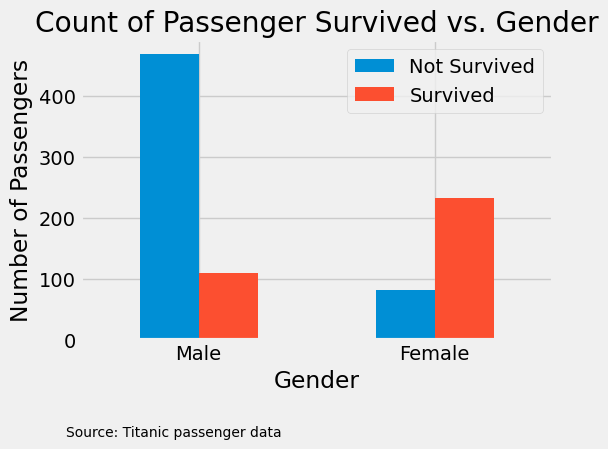

In [134]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
gender_data.plot(kind='bar')
plt.title('Count of Passenger Survived vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout(pad=2.5)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend(['Not Survived', 'Survived'])
plt.figtext(0.5, 0.01, 'Source: Titanic passenger data', ha='right', fontsize=10)  
plt.show()

In [107]:
fare_data = df[['Fare', 'Survived']]
fare_data = fare_data[fare_data['Survived'] != 0]
fare_data['Fare'].astype("int64")


1      71
2       7
3      53
8      11
9      30
       ..
875     7
879    83
880    26
887    30
889    30
Name: Fare, Length: 342, dtype: int64

In [112]:
fares = np.array(fare_data["Fare"])
print(fares)

[ 71.2833   7.925   53.1     11.1333  30.0708  16.7     26.55    16.
  13.       7.225   13.       8.0292  35.5     31.3875   7.8792 146.5208
   7.75     7.2292  11.2417  41.5792   7.8792   7.75    76.7292  26.
  35.5     10.5     27.75    80.      15.2458  10.5      7.925   56.4958
  29.      12.475    9.5      7.7875  10.5     15.85   263.      63.3583
  23.       7.65     7.775   24.15    13.      11.2417   7.1417  22.3583
  26.      26.2833   7.75    15.85     7.7958  66.6      7.7333  15.75
  20.525   55.      11.1333  39.      22.025   15.5     26.55    13.
   7.8542  26.      27.7208 146.5208   7.75     8.05    18.7875   7.75
  31.      21.     113.275    7.925   76.2917   8.05    90.      10.5
  83.475   31.3875  26.25    15.5     14.5     52.5542  15.2458  79.2
  86.5    512.3292  26.      31.3875   7.775  153.4625 135.6333   0.
  19.5      7.75    77.9583  20.25     8.05     9.5     13.       7.75
  78.85    91.0792  30.5    247.5208   7.75    23.25    12.35   151.55
 110.883

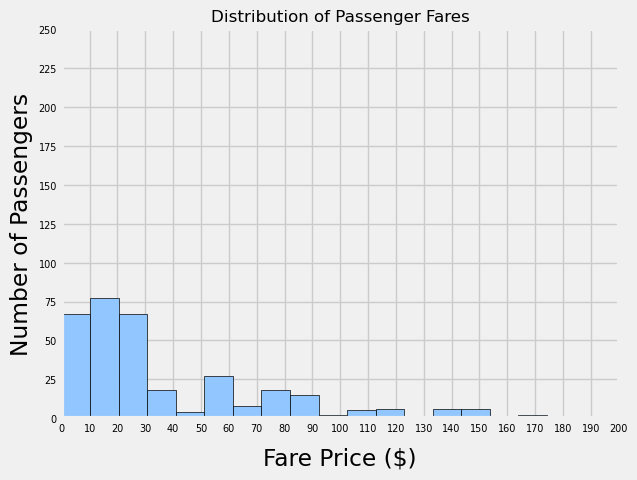

In [130]:
import matplotlib.pyplot as plt


plt.hist(fares, bins=50, edgecolor='black')  
plt.xlabel('Fare Price ($)', labelpad=10)  
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Fares', fontsize=12)


plt.grid(True)  
plt.xlim(0, 180)  
plt.ylim(0, 250)  
plt.xticks(range(0, 201, 10), fontsize=7)
plt.yticks(range(0, 251,25),fontsize=7)
plt.grid(True)
plt.style.use('seaborn-v0_8-pastel')
plt.show()
